In [2]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
list_of_pkl_files = os.listdir(path='../data/data/')
list_of_pkl_files = [f for f in list_of_pkl_files if f.endswith('.pkl')]
list_of_pkl_files.sort()

guess_data_shape = set()

for file_path in list_of_pkl_files:
        # with open("data/rat001_02.gift_ica_0.pkl", "rb") as f:
        with open(os.path.join('../data/data', file_path), "rb") as f:
                var = pickle.load(f)
        guess_data_shape.add((var[0].shape, var[0].dtype, var[1].shape, var[1].dtype, var[2]))

print(f"Different Types #{len(guess_data_shape)}")
print(*guess_data_shape, sep="\n")
print()

print("Data Range of var[0]")
print(np.min(var[0], axis=None))
print(np.max(var[0], axis=None))
print()

print("Data Range of var[1]")
print(np.min(var[1], axis=None))
print(np.max(var[1], axis=None))
print(var[2])

Different Types #2
((64, 64, 20), dtype('float64'), (1, 1178), dtype('float64'), 0)
((64, 64, 20), dtype('float64'), (1, 1178), dtype('float64'), 1)

Data Range of var[0]
-4.283944606781006
6.387252330780029

Data Range of var[1]
-9.875741958618164
5.734953880310059
1


/tmp/ipykernel_2128620/2110174659.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


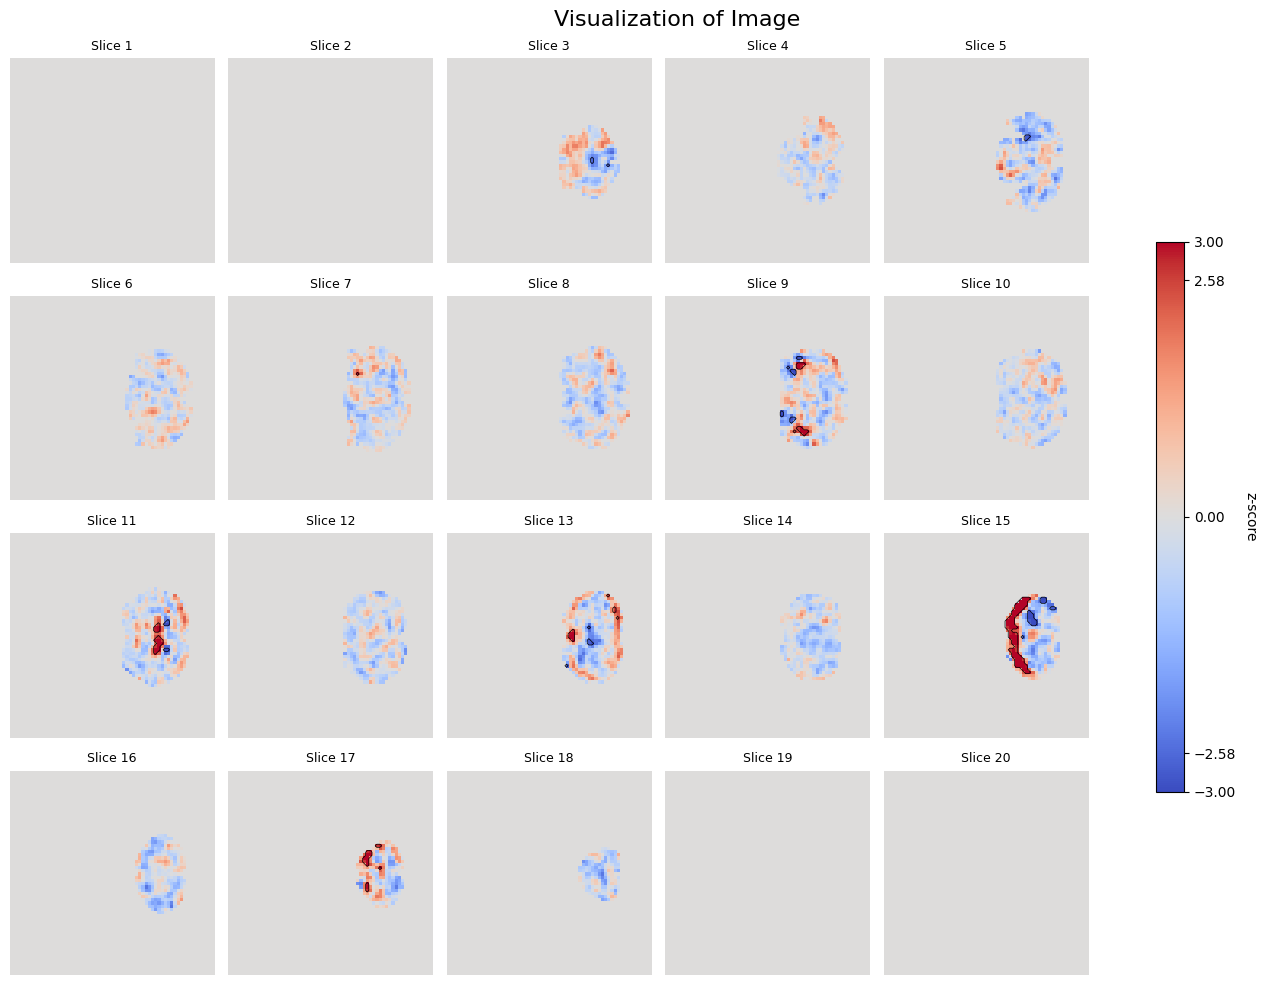

In [4]:
import numpy as np, matplotlib.pyplot as plt
slices = var[0].astype(np.float32)
fig, axes = plt.subplots(4, 5, figsize=(14, 10), constrained_layout=True)
fig.suptitle("Visualization of Image", fontsize=16)

# 1️⃣ 对称亮度范围
abs_max = 3.0               # 可改成 np.percentile(abs(slices), 99)
vmin, vmax = -abs_max, abs_max
threshold = 2.58            # 99% 双尾显著性

for i in range(20):
    ax = axes[i//5, i%5]
    img = slices[:, :, i]

    im = ax.imshow(img, cmap='coolwarm', vmin=vmin, vmax=vmax,
                   interpolation='nearest')
    # 2️⃣ 可选：加上显著性等值线
    mask = np.abs(img) >= threshold
    ax.contour(mask, levels=[0.5], colors='black', linewidths=0.5)

    ax.set_title(f"Slice {i+1}", fontsize=9)
    ax.axis('off')

plt.tight_layout()
cbar = fig.colorbar(im, ax=axes, shrink=0.6)
cbar.set_label("z-score", rotation=270, labelpad=15)
cbar.set_ticks([-abs_max, -threshold, 0, threshold, abs_max])
plt.savefig("slices.png", dpi=300, bbox_inches='tight')
plt.show()


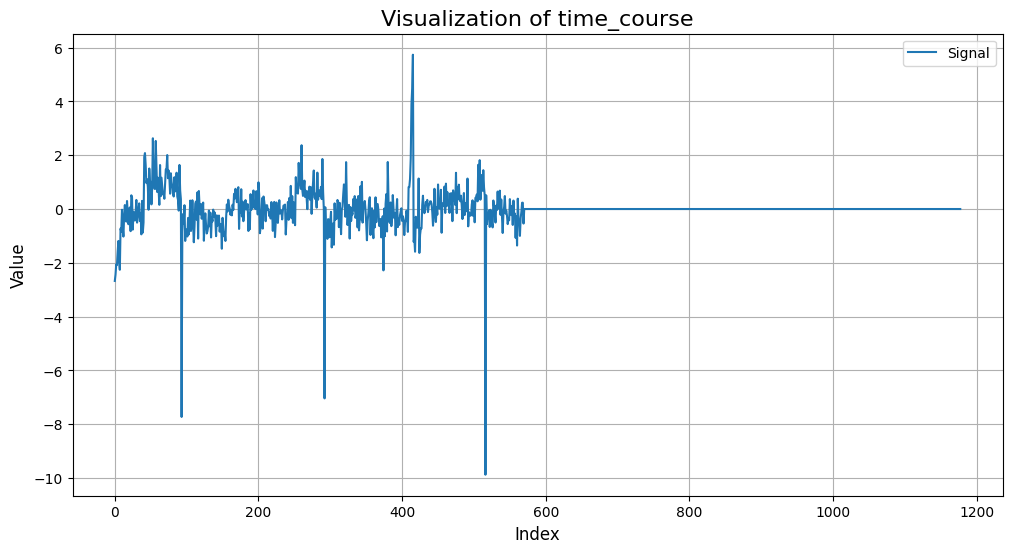

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(var[1][0,:], label="Signal")
plt.title("Visualization of time_course", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("time_course.png", dpi=300, bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'FFT of Time Course')

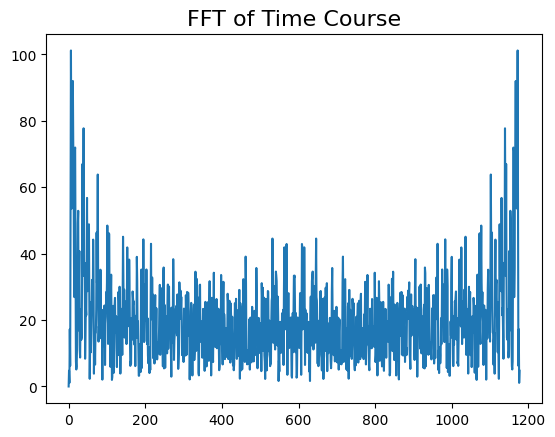

In [7]:
fft_of_timecourse = np.fft.fft(var[1][0,:])
plt.figure()
plt.plot(np.abs(fft_of_timecourse), label="FFT of Time Course")
x_freq = np.fft.fftfreq(len(var[1][0,:]), d=1/1000)  # Assuming a sampling rate of 1000 Hz
plt.title("FFT of Time Course", fontsize=16)
